# EDA Notebook

## Data Source Link: [Kaggle](https://www.kaggle.com/datasets/mmakarovlab/serbia-car-sales-prices)

## Data Dictionary

**views** - The total number of views the car listing has received.<br>
**favorite** -	The number of users who have added the car to their favorite list.<br>
**post_info** -	Additional information about the post, such as the date it was created or any special notes provided by the seller.<br>
**price** -	The price of the car in Euro.<br>
**car_name** -	manufacturer and model.<br>
**year** -	The year the car was manufactured.<br>
**A/C** -	Indicates whether the car is equipped with air conditioning.<br>
**emission_class** -	The car’s emission standard classification.<br>
**seats_amount** -	The number of seats in the car.<br>
**horsepower** -	The engine power measured in horsepower.<br>
**color** -	The exterior color of the car.<br>
**car_mileage, km** -	The car’s mileage in kilometers.<br>
**engine_capacity, cc** -	The engine capacity in cubic centimeters (cc).<br>
**type_of_drive** -	Indicates the type of drive, such as front-wheel drive or all-wheel drive.<br>
**doors** -	The number of doors on the car.<br>
**fuel** -	The type of fuel the car uses, such as gasoline or diesel.<br>
**car_type** -	The category or body style of the car (e.g., sedan, SUV, hatchback).<br>
**gearbox** -	The type of transmission, such as manual or automatic.<br>
**post_info** - contains information about date when announcement was created or updated since ***08.10.2024***. So if you want to get date you need to subtract days/weeks/months in column from 08.10.2024.

## Data import

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [88]:
data = pd.read_csv('serbia_car_sales_price_2024_v2.csv')
data.head(3)

,views,favorite,post_info,price,car_name,year,A/C,emission_class,seats_amount,horsepower,color,"car_mileage, km","engine_capacity, cc",type_of_drive,doors,fuel,car_type,gearbox
0,58,0,posted a week ago,1100,Alfa Romeo 11.9,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,0,posted 2 days ago,1100,Alfa Romeo 145,2000,manual A/C,Euro 3,5.0,106 HP (78 kW),gray,158546.0,1400.0,front,2/3 doors,petrol + gas,hatchback,"manual, 5 speeds"
2,136,4,posted 2 weeks ago,950,Alfa Romeo 145,1999,manual A/C,Euro 3,5.0,105 HP (77 kW),green,337000.0,1910.0,front,2/3 doors,diesel,hatchback,"manual, 5 speeds"


## Inspect columns

In [90]:
data.columns

Index(['views', 'favorite', 'post_info', 'price', 'car_name', 'year', 'A/C',
       'emission_class', 'seats_amount', 'horsepower', 'color',
       'car_mileage, km', 'engine_capacity, cc', 'type_of_drive', 'doors',
       'fuel', 'car_type', 'gearbox'],
      dtype='object')

In [91]:
data.shape

(8413, 18)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   views                8413 non-null   int64  
 1   favorite             8413 non-null   int64  
 2   post_info            8413 non-null   object 
 3   price                8413 non-null   int64  
 4   car_name             8413 non-null   object 
 5   year                 8413 non-null   int64  
 6   A/C                  8403 non-null   object 
 7   emission_class       7076 non-null   object 
 8   seats_amount         8403 non-null   float64
 9   horsepower           8403 non-null   object 
 10  color                8403 non-null   object 
 11  car_mileage, km      8404 non-null   float64
 12  engine_capacity, cc  8403 non-null   float64
 13  type_of_drive        8404 non-null   object 
 14  doors                8403 non-null   object 
 15  fuel                 8404 non-null   o

## EDA
### Steps
1.  **Missing Values and Duplicates**
2.  **Eplore About Numerical Variables**
3.  **Explore About Categorical Variables**
4.  **Finding Relationship between features**

### Missing Values and Duplicates

In [95]:
# Missing values
[features for features in data.columns if data[features].isnull().sum()>0]

['A/C',
 'emission_class',
 'seats_amount',
 'horsepower',
 'color',
 'car_mileage, km',
 'engine_capacity, cc',
 'type_of_drive',
 'doors',
 'fuel',
 'car_type',
 'gearbox']

In [96]:
data.isnull().sum()

views                     0
favorite                  0
post_info                 0
price                     0
car_name                  0
year                      0
A/C                      10
emission_class         1337
seats_amount             10
horsepower               10
color                    10
car_mileage, km           9
engine_capacity, cc      10
type_of_drive             9
doors                    10
fuel                      9
car_type                  8
gearbox                  10
dtype: int64

**Insight:** `emission_class` attribute has alot of missing values, hence we might not consider it for our model

In [98]:
# Duplicated values
data.duplicated().sum()

1

### Explore Numeric features

In [100]:
# Columns with numeric data type
numeric = data.select_dtypes(include='number')
numeric.columns

Index(['views', 'favorite', 'price', 'year', 'seats_amount', 'car_mileage, km',
       'engine_capacity, cc'],
      dtype='object')

In [101]:
numeric.head(3)

,views,favorite,price,year,seats_amount,"car_mileage, km","engine_capacity, cc"
0,58,0,1100,2002,NaN,NaN,NaN
1,55,0,1100,2000,5.0,158546.0,1400.0
2,136,4,950,1999,5.0,337000.0,1910.0


In [102]:
# Summarising numeric data numerically
numeric = numeric.drop('year', axis=1)
numeric.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
views,8413.0,308.70,8.473900e+02,0.0,61.0,114.0,245.0,2.777000e+04
favorite,8413.0,2.67,5.100000e+00,0.0,0.0,1.0,3.0,1.510000e+02
price,8413.0,4848.23,5.631950e+03,100.0,1600.0,3300.0,5950.0,8.200000e+04
seats_amount,8403.0,4.94,7.300000e-01,2.0,5.0,5.0,5.0,9.000000e+00
"car_mileage, km",8404.0,2851955.01,1.047541e+08,1.0,176719.0,220000.0,270000.0,4.294967e+09
"engine_capacity, cc",8403.0,1725.21,5.242800e+02,100.0,1400.0,1700.0,1995.0,1.000000e+04


In [103]:
# A function that calculates summary statistics, creates density plots, histograms, and boxplots
def numeric_cols(df,x):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    print(f'{"="*120}')
    print(f'5 Number Summary of {x} Attribute:\n'
          f'{x}(min)              :{x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x}(max) : {x_max}'
         )

    fig = plt.figure(figsize=(10, 5))
    plt.subplots_adjust(hspace= 0.6)
    sns.set_palette('pastel')
    sns.set_style('darkgrid') 

    # Density Distribution
    plt.subplot(221)
    ax1 = sns.histplot(df[x], kde=True)
    plt.title(f'{x} Density Distribution')

    # Boxplot
    plt.subplot(222)
    ax1 = sns.boxplot(x=df[x], width=0.7, linewidth=0.6)
    plt.title(f'{x} Boxplot')

    # Cumulative Density Distribution
    plt.subplot(223)
    ax1 = sns.kdeplot(df[x], cumulative=True)
    plt.title(f'{x} Cumulative Density Distribution')

    plt.show()

5 Number Summary of views Attribute:
views(min)              :0
Q1                    : 61.0
Q2(Median)            : 114.0
Q3                    : 245.0
views(max) : 27770


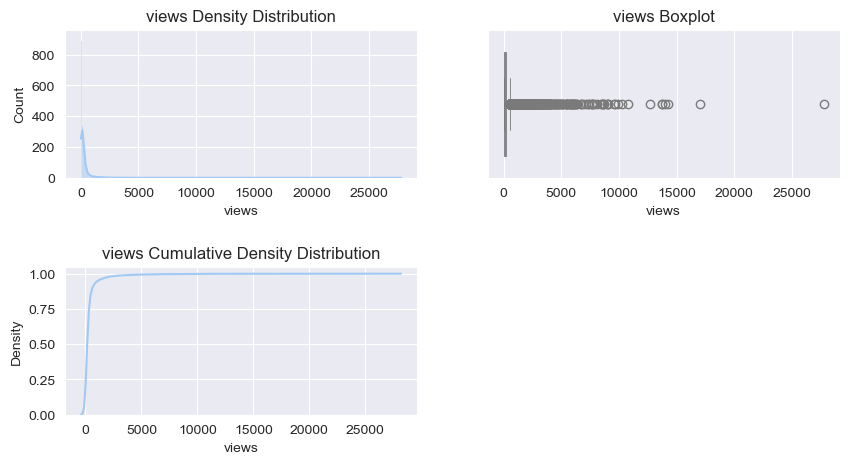

5 Number Summary of favorite Attribute:
favorite(min)              :0
Q1                    : 0.0
Q2(Median)            : 1.0
Q3                    : 3.0
favorite(max) : 151


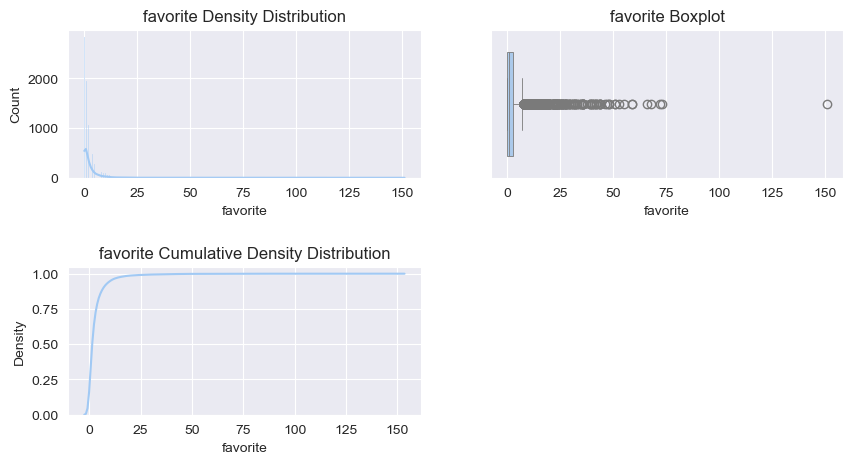

5 Number Summary of price Attribute:
price(min)              :100
Q1                    : 1600.0
Q2(Median)            : 3300.0
Q3                    : 5950.0
price(max) : 82000


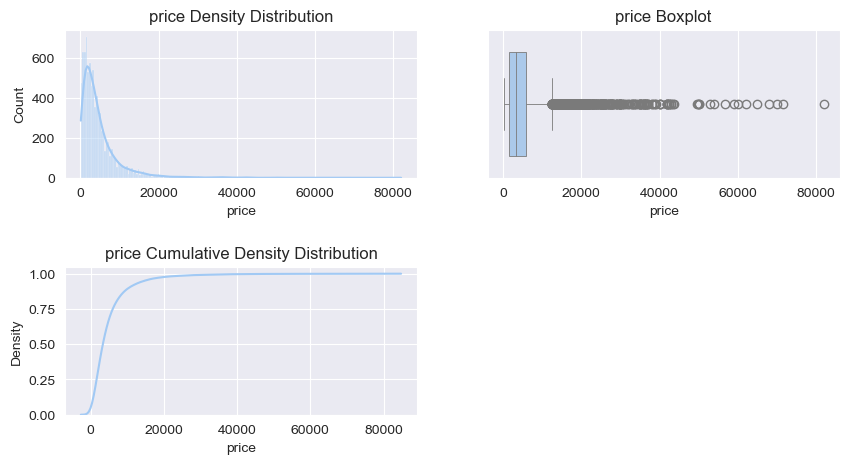

5 Number Summary of engine_capacity, cc Attribute:
engine_capacity, cc(min)              :100.0
Q1                    : 1400.0
Q2(Median)            : 1700.0
Q3                    : 1995.0
engine_capacity, cc(max) : 10000.0


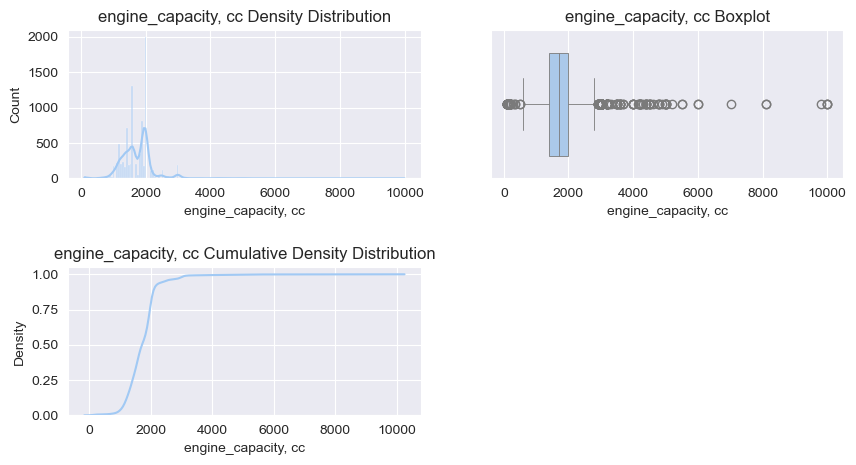

In [151]:
numeric_columns = ['views', 'favorite', 'price','engine_capacity, cc']
for col in numeric_columns:
    numeric_cols(data, col)

## Explore categorical features

In [110]:
categorical = data.select_dtypes(include='object')
categorical.columns

Index(['post_info', 'car_name', 'A/C', 'emission_class', 'horsepower', 'color',
       'type_of_drive', 'doors', 'fuel', 'car_type', 'gearbox'],
      dtype='object')

In [111]:
categorical.head(3)

,post_info,car_name,A/C,emission_class,horsepower,color,type_of_drive,doors,fuel,car_type,gearbox
0,posted a week ago,Alfa Romeo 11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,posted 2 days ago,Alfa Romeo 145,manual A/C,Euro 3,106 HP (78 kW),gray,front,2/3 doors,petrol + gas,hatchback,"manual, 5 speeds"
2,posted 2 weeks ago,Alfa Romeo 145,manual A/C,Euro 3,105 HP (77 kW),green,front,2/3 doors,diesel,hatchback,"manual, 5 speeds"


In [112]:
# Check the number of levels (observations) from each categorical attribute
categorical.nunique()

post_info          23
car_name          714
A/C                 3
emission_class      6
horsepower        265
color              19
type_of_drive       3
doors               2
fuel                8
car_type            8
gearbox             6
dtype: int64


**Insight:** The `doors` attribute has the fewest categories, with 2, while `car_name` has the most, with 714 categories.stments!

**Visualization:**  
- Use pie charts for categories with 5 or fewer values.  
- Use vertical bar graphs for categories with 6 to 10 values (inclusive).  
- Use horizontal bar graphs for the top 10 categories when there are more than 10 values. 

**Pie charts for categories**

In [116]:
def plot_pie_charts(df, columns):
    """
    Plots pie charts for categorical columns.

    Parameters:
    - df: dataFrame
    - columns: List of categorical columns to plot
    """
    n_cols=3 # number of columns needed
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

    # Set plot style
    sns.set_style('darkgrid')  
    plt.figure(figsize=(15, 5 * n_rows))  

    # Loop through categorical columns and plot pie charts
    for i, col in enumerate(columns[:n_cols * n_rows]):  
        plt.subplot(n_rows, n_cols, i + 1)  
        # Create the pie chart
        counts = df[col].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90)
        plt.title(f'Pie Chart of {col}', fontsize=16)  

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

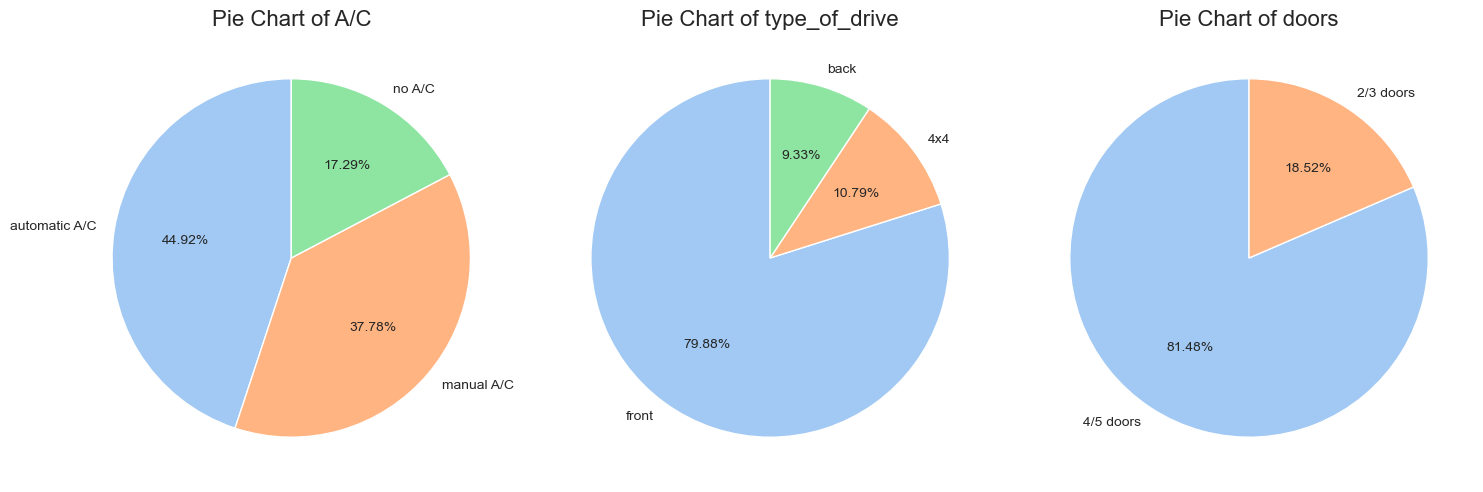

In [117]:
# Pie charts for categorical columns with 5 or fewer unique values
filtered_columns = [col for col in categorical if data[col].nunique() <= 5]
plot_pie_charts(data, filtered_columns)

**Bar graphs for categories**

In [119]:
def plot_count_plots(df, columns):
    """
    Plots count plots for categorical columns with 6 to 10 unique values.

    Parameters:
    - df: DataFrame containing the data
    - columns: List of categorical columns to plot
    """
    n_cols=3 # number of columns needed
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

    # Set plot style
    sns.set_style('darkgrid')  
    plt.figure(figsize=(15, 5 * n_rows)) 

    # Loop through categorical columns and plot count plots
    for i, col in enumerate(columns[:n_cols * n_rows]): 
        plt.subplot(n_rows, n_cols, i + 1) 
        
        # Create the count plot for the current column
        ax = sns.countplot(data=df, x=col)
        
        # Add data labels to each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=12)
        
        # Set title and labels
        plt.title(f'Count Plot of {col}', fontsize=16) 
        plt.xlabel(col, fontsize=14) 
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45) 

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

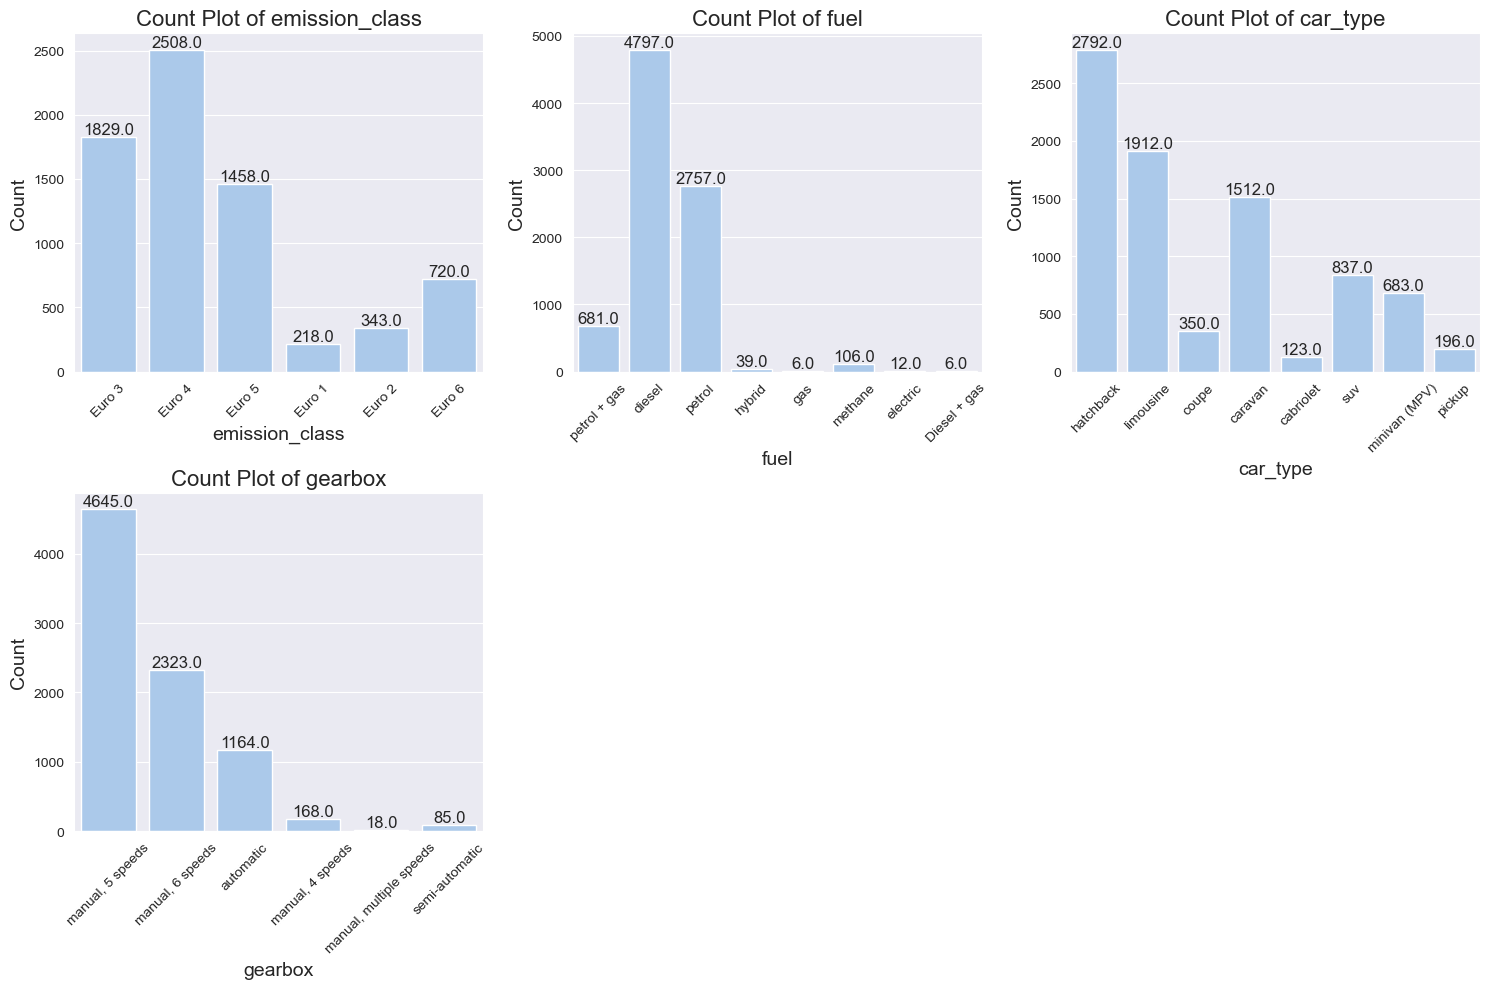

In [120]:
# Bar graphs for categorical columns with unique values from 6 to 10
filtered_columns = [col for col in categorical if data[col].nunique() > 5 and data[col].nunique() <= 10]
plot_count_plots(data, filtered_columns)

**Horizontal bar graphs for categories**

In [122]:
def plot_top_categories(df, columns):
    """
    Plots horizontal bar graphs for categorical columns.

    Parameters:
    - df: DataFrame containing the data
    - columns: List of categorical columns to analyze
    """
    n_cols = 3  # Number of columns
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

    # Set plot style
    sns.set_style('darkgrid')  
    plt.figure(figsize=(15, 5 * n_rows))  # Set the figure size

    # Loop through categorical columns and plot horizontal bar graphs categories
    for i, col in enumerate(columns):  # Loop over all the columns
        plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot in the grid
        
        # Get the top 10 categories for the current column
        top_categories = df[col].value_counts().nlargest(10)
        
        # Create the horizontal bar plot
        ax = sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')  
        
        # Add data labels to each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_width():.0f}', 
                        (p.get_width(), p.get_y() + p.get_height() / 2), 
                        ha='left', va='center', fontsize=12)
        
        # Set title and labels
        plt.title(f'Top 10 Categories in {col}', fontsize=16) 
        plt.xlabel('Count', fontsize=14) 
        plt.ylabel(col, fontsize=14)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

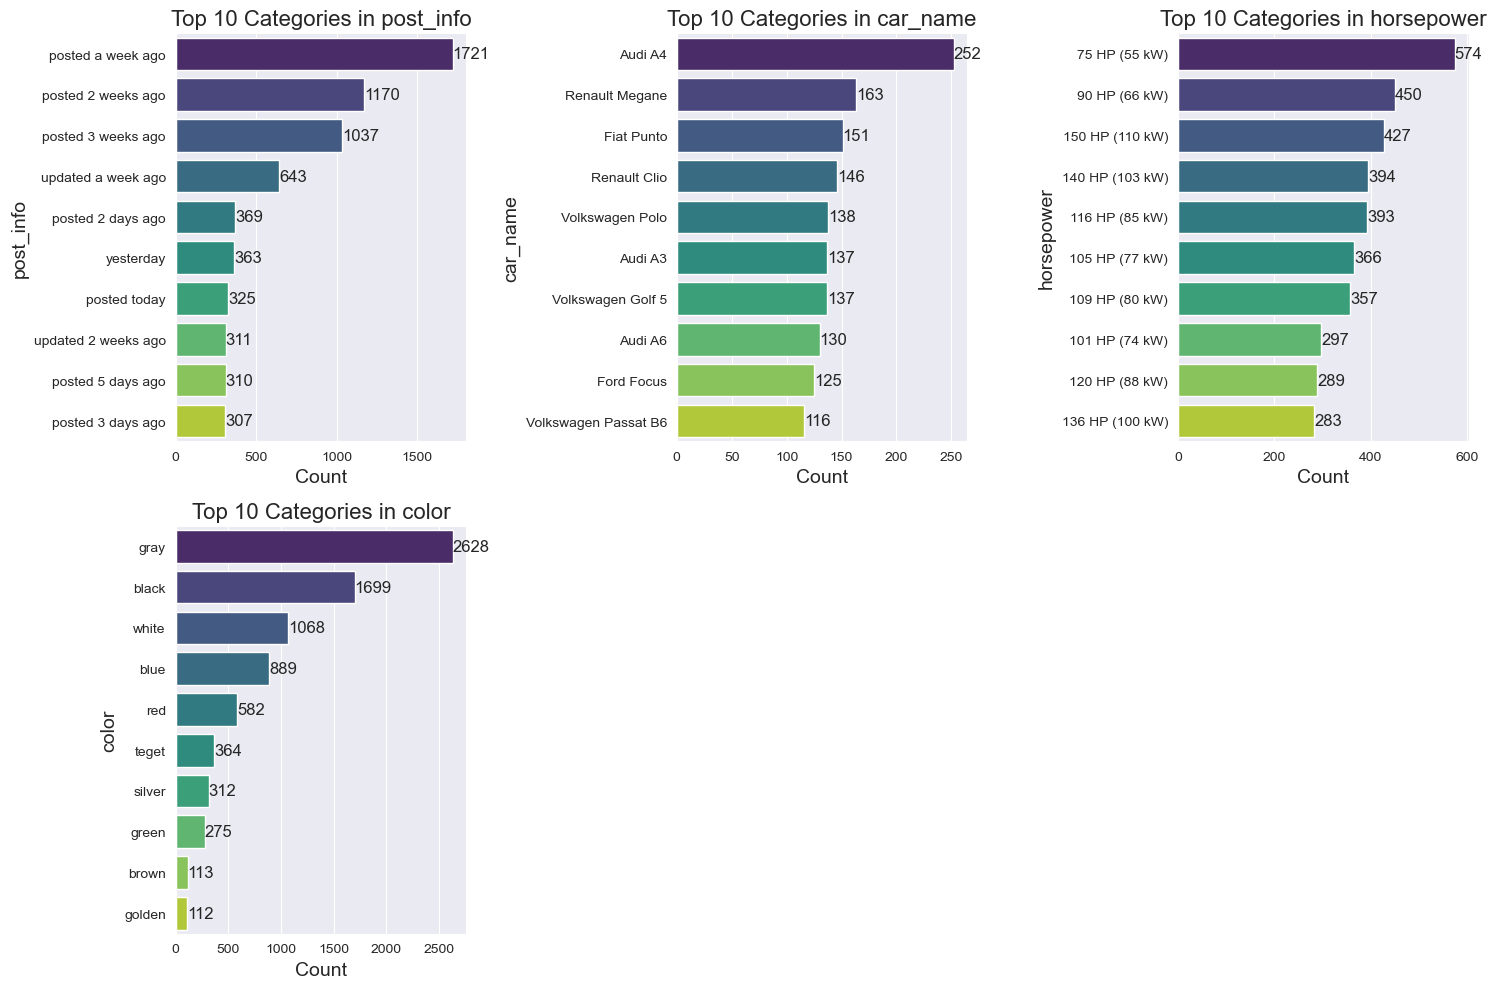

In [123]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Horizontal bar graphs for categorical columns with more than 10 unique values
filtered_columns = [col for col in categorical if data[col].nunique() > 10]
plot_top_categories(data, filtered_columns)

## Data Cleaning

In [48]:
# Drop the 'emission_class' column by specifying its name
data = data.drop('emission_class', axis=1)

In [49]:
# Duplicates
car_clean = data.copy()  # create a copy of the DataFrame
car_clean = car_clean.drop_duplicates()  # call the drop_duplicates method
print(f'Deleted {data.shape[0] - car_clean.shape[0]} duplicated rows')

Deleted 1 duplicated rows


In [199]:
print(car_clean.isna().sum() / car_clean.shape[0] * 100)
actual_rows = car_clean.shape[0] # gives the total number of rows before dropping null values
# Drop rows containing any missing values (NaNs)
car_clean = car_clean.dropna()
# Store the number of rows after dropping the null values
new_rows = car_clean.shape[0]
# Print the number of rows deleted due to missing values
print(f'Deleted {actual_rows - new_rows} rows containing null values')

views                  0.0
favorite               0.0
post_info              0.0
price                  0.0
car_name               0.0
year                   0.0
A/C                    0.0
seats_amount           0.0
horsepower             0.0
color                  0.0
car_mileage, km        0.0
engine_capacity, cc    0.0
type_of_drive          0.0
doors                  0.0
fuel                   0.0
car_type               0.0
gearbox                0.0
dtype: float64
Deleted 0 rows containing null values
